# OVERVIEW

1. Problem Statement
2. Importing Dataset and required libraries
3. Exploratory Data Analysis
    * Univariate Analysis
    * Bivariate Analysis
4. Data Cleaning
5. Feature Engineering
6. Feature Selection
7. Model Selection
     * Linear Regression
     * Lasso Regression
     * SVM
     * KNN
     * Decision Tree
     * Random Forest
     * XGBoost
8. Predicting sales of test dataset

# 1. Problem Statement

The data scientists at big mart have collected 2013 sales data for 1559 products across 10 stores in different cities.The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model bigmart will try to understand the properties of products and stores which play a key role increasing sales.

# 2. Importing libraries and Datasets

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading files
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

It is generally a good idea to combine both train and test data sets into one then perform feature engineering and then divide them later again. This saves the trouble of performing the same steps of FE twice on test and train.

Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.So,that it is easy to divide train and test later

In [3]:
#combining train and test datas
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
data.head()

#outet_Identifier==store_id

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


# 3. Data Exploration

In [9]:
data.shape, train.shape, test.shape

((14204, 13), (8523, 13), (5681, 12))

In [ ]:
data.describe()

**Some Observations**

1. zero value in item visibility doesn't make sense.
2. Except for item_visibility and Item_Outlet_sales, mean and 50% of others are almost same.so,there may be no outlers in others.

In [18]:
#missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

 Missing values of Item_Outlet_Sales are from test set whih we can ignore.
 
 Need to take care of Missing values of Item_Weight and Outlet_Size.

**1. Numeric Features**: 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Item_Outlet_Sales'

**2. Categoric Features**: 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'

## A) Univariate Analysis

In [23]:
#top 5 sales
data.nlargest(5,'Item_Outlet_Sales')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648,train
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600,train
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020,train
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896,train
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840,train


All of top 5 sales are from same store

In [25]:
#bottom 7 sales
data.nsmallest(7,'Item_Outlet_Sales')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
906,DRK12,9.500,Low Fat,0.000000,Soft Drinks,32.8900,OUT010,1998,NaN,Tier 3,Grocery Store,33.2900,train
6950,NCR42,9.105,Low Fat,0.064411,Household,33.3900,OUT010,1998,NaN,Tier 3,Grocery Store,33.2900,train
2571,FDU21,NaN,Regular,0.134328,Snack Foods,35.0558,OUT019,1985,Small,Tier 1,Grocery Store,33.9558,train
3053,NCL41,NaN,Low Fat,0.073077,Health and Hygiene,34.3216,OUT019,1985,Small,Tier 1,Grocery Store,34.6216,train
7388,FDQ47,7.155,Regular,0.281510,Breads,33.8874,OUT010,1998,NaN,Tier 3,Grocery Store,35.2874,train
4265,FDS40,15.350,Low Fat,0.023466,Frozen Foods,35.2190,OUT010,1998,NaN,Tier 3,Grocery Store,36.6190,train
7612,FDS40,NaN,Low Fat,0.024546,Frozen Foods,34.6190,OUT019,1985,Small,Tier 1,Grocery Store,36.6190,train


Least sales are mainly from stores OUT010 and OUT019 and all are from Grocery Stores.

### i) Numeric Features

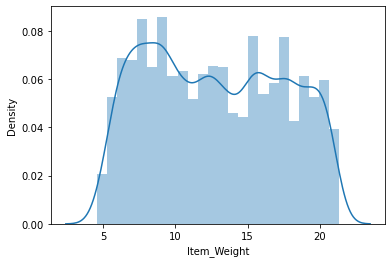

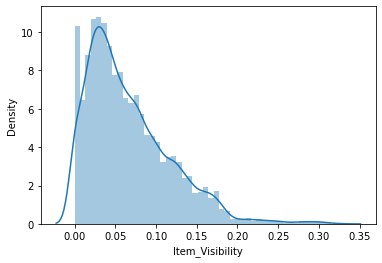

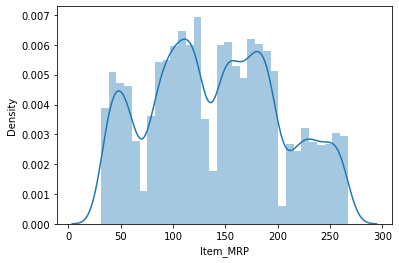

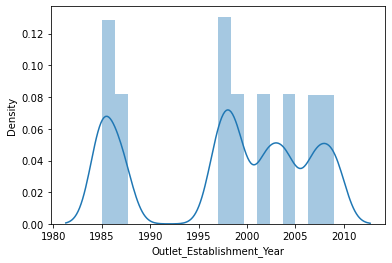

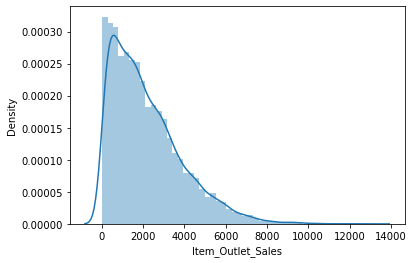

<Figure size 432x288 with 0 Axes>

In [26]:
#Numeric Features
num_columns= ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for i in num_columns:
    sns.distplot(data[i])
    plt.figure()

1. Item_Visibility and Item_Outlet_Sales have outliers. So,need to treat them with median due to +ve skewness(asymmetry of probability distribution about its mean).
2. As there is no skewness in item_weight plot we can impute mean value at missing values.

In [19]:
data['Item_Outlet_Sales'].skew()

1.1775306028542796

In [20]:
data[data['Item_Visibility']==0].count()

Item_Identifier              879
Item_Weight                  733
Item_Fat_Content             879
Item_Visibility              879
Item_Type                    879
Item_MRP                     879
Outlet_Identifier            879
Outlet_Establishment_Year    879
Outlet_Size                  649
Outlet_Location_Type         879
Outlet_Type                  879
Item_Outlet_Sales            526
source                       879
dtype: int64

### ii) Categoric Features

In [27]:
#unique values in each column
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

Tells us that there are **1559 products and 10 stores**.

There are 16 unique items in total.

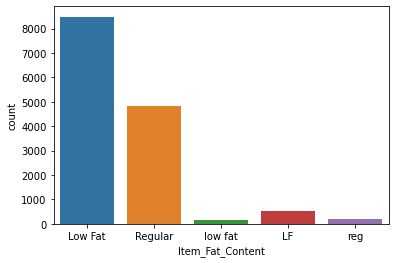

<Figure size 432x288 with 0 Axes>

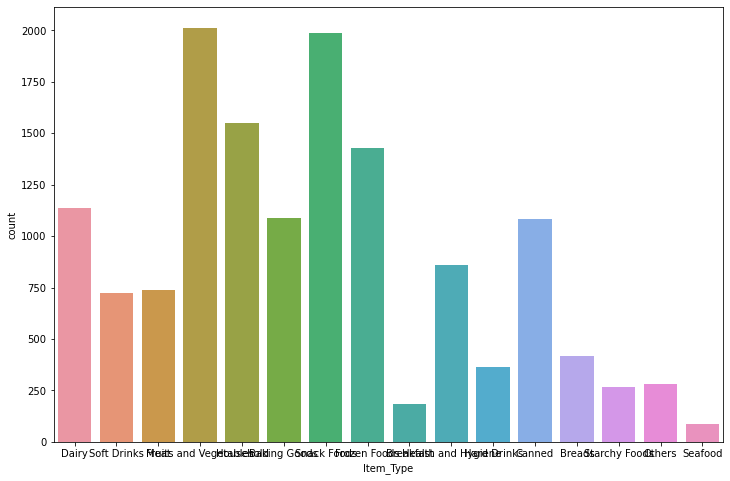

<Figure size 432x288 with 0 Axes>

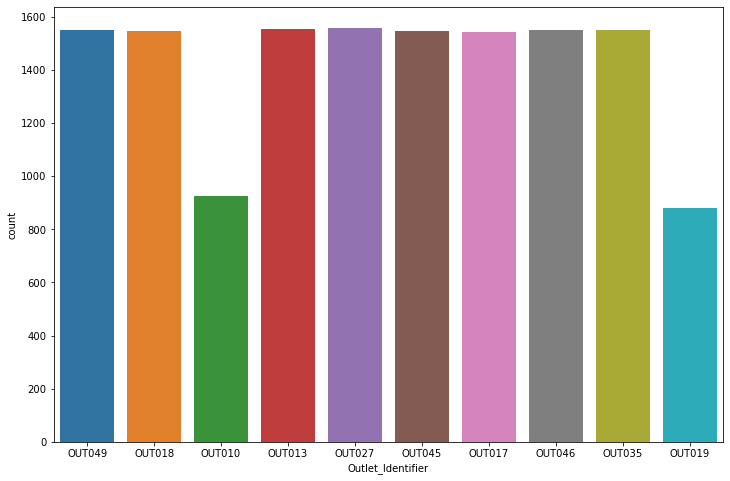

<Figure size 432x288 with 0 Axes>

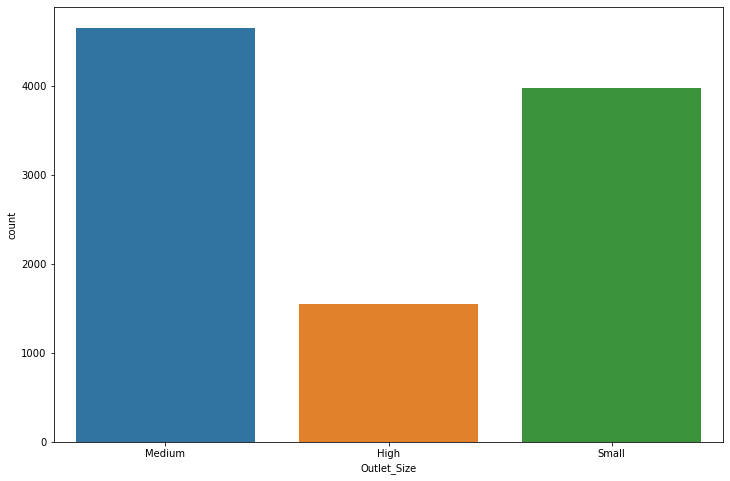

<Figure size 432x288 with 0 Axes>

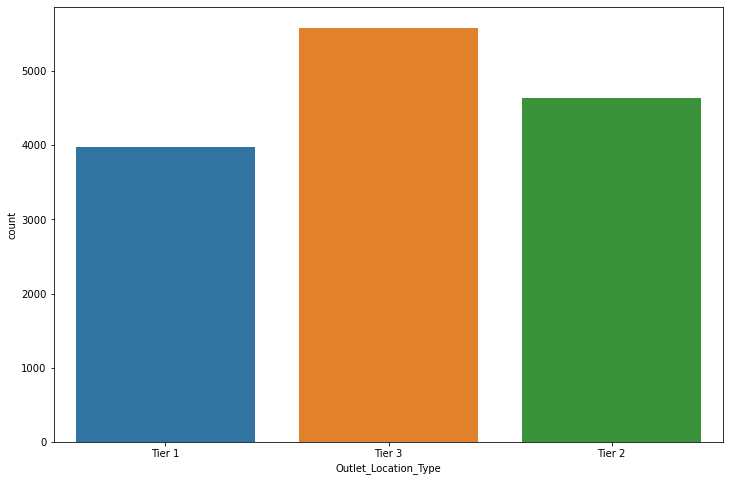

<Figure size 432x288 with 0 Axes>

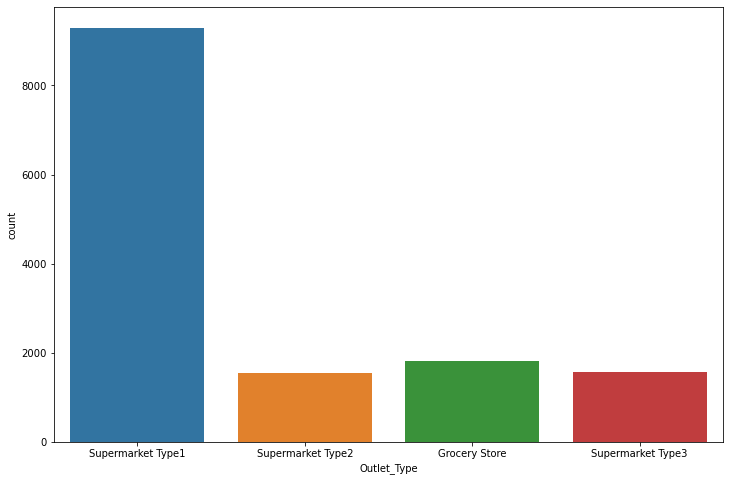

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [35]:
cat_columns= ['Item_Fat_Content','Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in cat_columns:
    sns.countplot(data[i])
    plt.figure()
    plt.figure(figsize=(12,8))

1. Low Fat is mis printed as low fat,LF and regular as reg.so, have to combine them in future.
2. Low Fat products are more than others(that looks normal as everyone prefers them).
3. Total stores of OUT010 and OUT019 are less that explains why lowest sales are present in these stores.
4. Medium size stores are more than others(may be should consider increasing the high size stores to increase the sales).
5. Stores are mostly at tier 3 locations.
6. Most of the stores are of Supermarket Type1.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

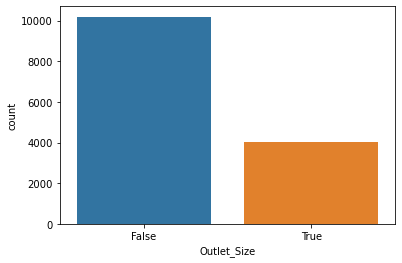

In [36]:
sns.countplot(data['Outlet_Size'].isna())

In [34]:
#count of unique rows in categorical features
data['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.141721
Snack Foods              0.140031
Household                0.108983
Frozen Foods             0.100394
Dairy                    0.079977
Baking Goods             0.076457
Canned                   0.076317
Health and Hygiene       0.060406
Meat                     0.051816
Soft Drinks              0.051112
Breads                   0.029288
Hard Drinks              0.025486
Others                   0.019713
Starchy Foods            0.018938
Breakfast                0.013095
Seafood                  0.006266
Name: Item_Type, dtype: float64

while converting categorical features to numerics we don't want too many different rows in a column. so,if possible need to combine them. Here lets see whether we an join results of Item_Type and also of Outlet_Type.

After observing the first two letters of Item_Identifier it looks like it can be combine Item_Type

In [ ]:
#slicing the first two letters of item_identifier
s1=data['Item_Identifier'].str.slice(0,2)
s1

In [ ]:
#counting the noof unique rows of sliced column
s1.value_counts()

we can combine item_type into 3 categories

FD--Food

NC--Non Consumable

DR--Drinks         

lets do that in feature engineering part.

## B) Bivariate Analysis

### Hypothesis on sales

1. **Fat content** : Low fat contents are generally used(more sales for low  fat content items)
2. **item visibility** : More visible items are likely to catch more attention and sell more.
3. **item type** : Daily use products sells more.
4. **item MRP** : low price items sells  more.
5. **outlet size**(store size) : stores which have huge space should have sells more as they act as a one stop place for everything.
6. **location type** : stores in urban area(tier 1) should have more sales due to the higher population,income of peoples.
7. **outlet type** : storeslike super market have all types of items so people would prefer going there.so,more sales.

### i) Numeric Features vs Target Feature

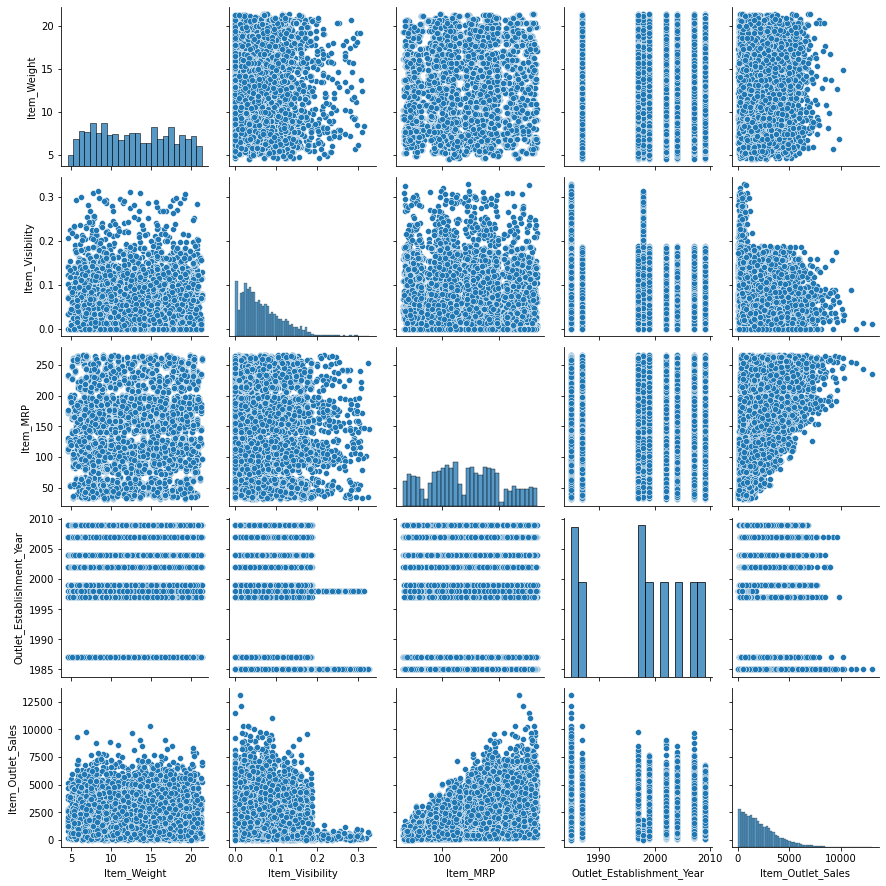

In [38]:
sns.pairplot(data)

Hypothesis 2 is not correct. Visibility is not effecting the sales (still doubt though)

In [40]:
data['Item_MRP'].max()

266.8884

Hypothesis 4 is not correct. The sales and Item prices are linearly increasing but maximum item price just 266 only.So, we can't say this linear relation will be true for high price products 

###  ii) Categoric Features vs Target Feature

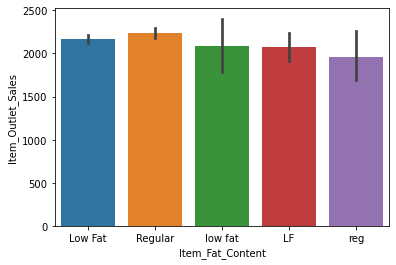

<Figure size 432x288 with 0 Axes>

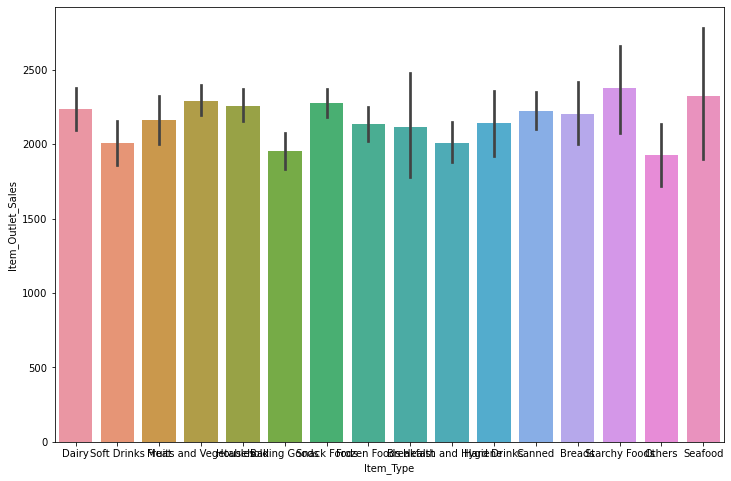

<Figure size 432x288 with 0 Axes>

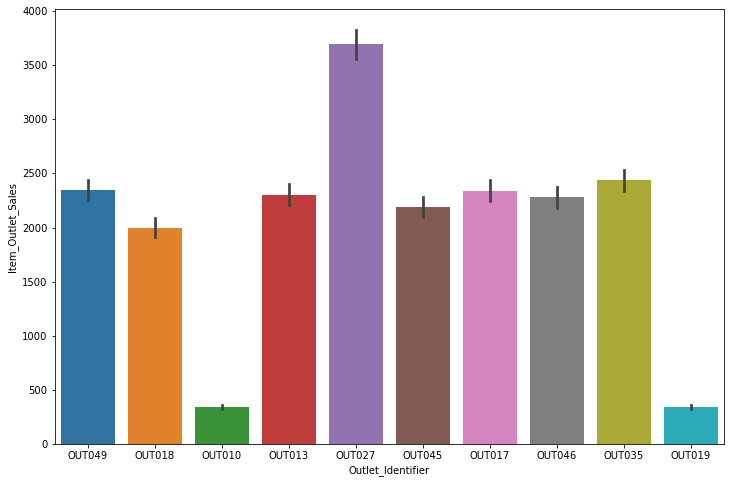

<Figure size 432x288 with 0 Axes>

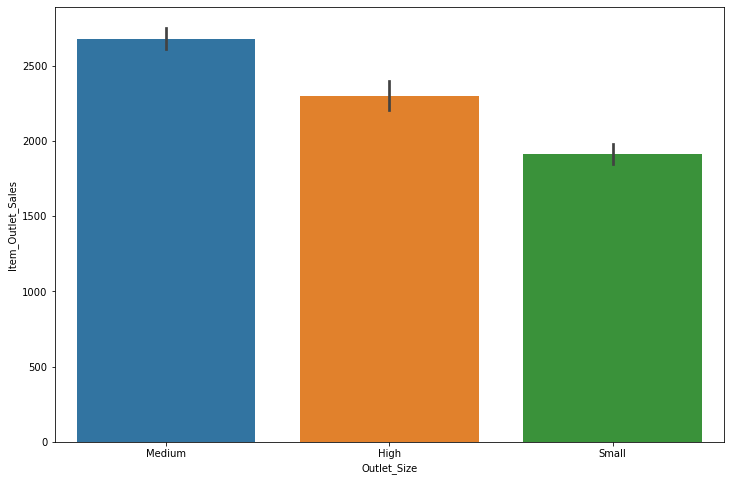

<Figure size 432x288 with 0 Axes>

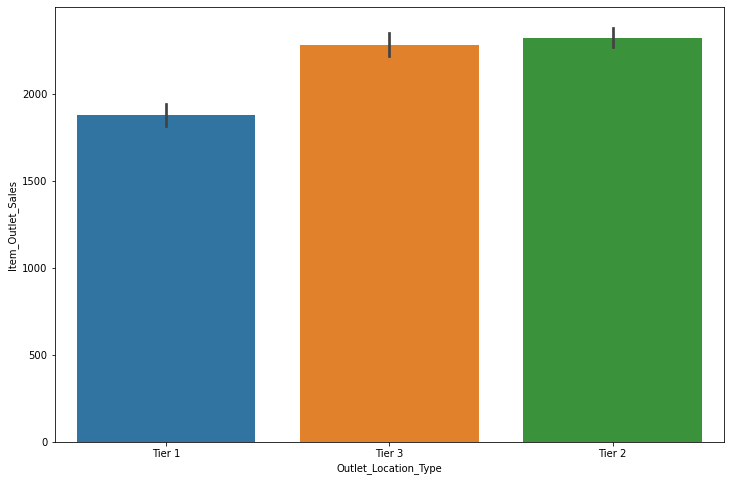

<Figure size 432x288 with 0 Axes>

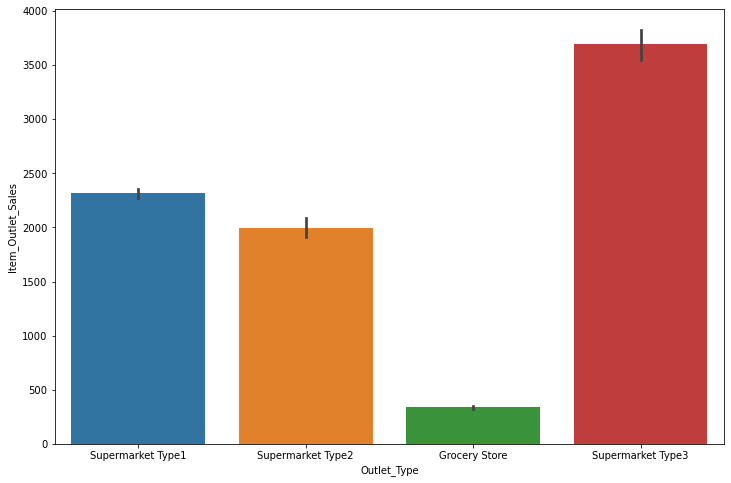

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [42]:
for i in cat_columns:
    sns.barplot(data[i],data['Item_Outlet_Sales'])
    plt.figure()
    plt.figure(figsize=(12,8))

1. Hypothesis 1 is correct. Low Fat(after combining low fat+LF) products have more sales
2. Store OUT027 have highest sales and OUT010,OUT019 have lowest sales
3. Hypothesis 5 is correct. Stores with more size have more sales
4. Hypothesis 6 is correct. Stores in urban area have more sales
5. Supermarket Type3 have more sales which is a useful info to open a nw store.

<AxesSubplot:xlabel='Item_Type'>

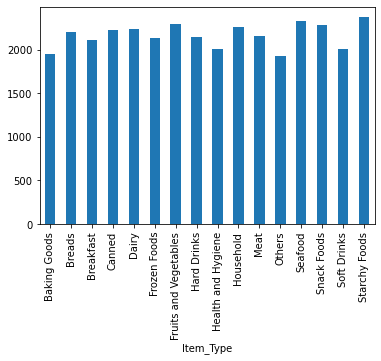

In [49]:
data.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')

Hypothesis 3 is correct. Daily use products have high sales.

# 4. Data Cleaning

## Imputing missing values

**a) Item_weight with mean**

In [51]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [52]:
data['Item_Weight'].isna().any()

False

**b) Outlet_Size with mode**

In [53]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [54]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [55]:
#boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull()

In [56]:
#original total missing values
sum(miss_bool)

4016

In [57]:
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [58]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Thus there are no missing values

# 5. Feature Engineering

**a) Modify Item_Visibility**

We noticed that the minimum value is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product

In [60]:
#Mean of individual products
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg.head(3)

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384


In [61]:
#boolean variable specifying 0 values of visibility
miss_bool = (data['Item_Visibility'] == 0)

In [62]:
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])

In [63]:
data[data['Item_Visibility']==0].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

**b) Handling Outliers**

In [64]:
def boundaries(df, variables):
    
    Q1=df[variables].quantile(.25)
    Q3=df[variables].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary, upper_boundary

In [65]:
def outliers(df,variables,LL,UL):
    #replacing outliers with lower and upper boundaries of IQR
    df.loc[df[variables]>=UL,variables]=UL
    df.loc[df[variables]<=LL,variables]=LL

In [66]:
out_columns=['Item_Visibility','Item_Outlet_Sales']
a=[]
for i in out_columns:
    a.append(boundaries(data,i))
a  

[(-0.06753251549999997, 0.19560807249999998), (-2566.3261, 6501.8699)]

In [68]:
i=0
while i<2:
    outliers(data,out_columns[i],a[i][0],a[i][1])
    i=i+1

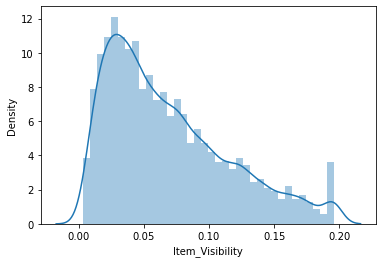

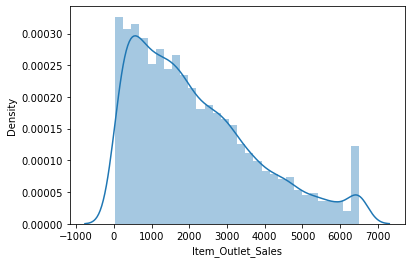

<Figure size 432x288 with 0 Axes>

In [69]:
for i in out_columns:
    sns.distplot(data[i])
    plt.figure()

**c) Consider combining Outlet_Type**

During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store. If they have similar sales, then keeping them separate won’t help much.

In [70]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2303.714679
Supermarket Type2,1994.847647
Supermarket Type3,3541.375602


This shows significant difference between them. So,we’ll leave them as it is.

**c) Create a broad category of Item_Type**

FD--Food

NC--Non Consumable

DR--Drinks

In [71]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [72]:
data['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 14204, dtype: object

In [73]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [74]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [75]:
data=data.drop(['Item_Type'],axis=1)

In [76]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.017834,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.009780,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


**d) Modify categories of Item_Fat_Content**

In [77]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

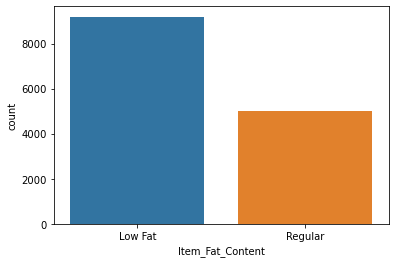

In [78]:
sns.countplot(data['Item_Fat_Content'])

**e) One Hot Encoding of categorical features**

In [79]:
data1 = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                                     'Item_Type_Combined'],drop_first=True)

In [80]:
data1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,0,0,0,1,0,1,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,1,0,1,1,0,0,1,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,0,0,0,1,0,1,0,0,1,0
3,FDX07,19.20,0.017834,182.0950,OUT010,1998,732.3800,train,1,0,1,0,1,0,0,0,1,0
4,NCD19,8.93,0.009780,53.8614,OUT013,1987,994.7052,train,0,0,1,0,0,1,0,0,0,1


**use of drop_first** : lets take item_fat_content as an example. In this there are two categories Low Fat and Regular.But we got only one column after one hot coding because we can understand Low Fat category from Regular as well i.e., if a value in Regular column is 0 it automatically means it is 1 in Low Fat column.

In [81]:
data1.shape

(14204, 18)

**f) converting data back into train and test data sets**

In [82]:
train1 = data1.loc[data['source']=="train"]
test1 = data1.loc[data['source']=="test"]

In [83]:
test1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
8523,FDW58,20.750000,0.007565,107.8622,OUT049,1999,NaN,test,0,0,0,1,0,1,0,0,1,0
8524,FDW14,8.300000,0.038428,87.3198,OUT017,2007,NaN,test,1,1,0,0,1,1,0,0,1,0
8525,NCN55,14.600000,0.099575,241.7538,OUT010,1998,NaN,test,0,0,1,0,1,0,0,0,0,1
8526,FDQ58,7.315000,0.015388,155.0340,OUT017,2007,NaN,test,0,1,0,0,1,1,0,0,1,0
8527,FDY38,12.792854,0.118599,234.2300,OUT027,1985,NaN,test,1,0,1,1,0,0,0,1,1,0


In [84]:
#Drop unnecessary columns:
test1.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train1.drop(['source'],axis=1,inplace=True)

Its generally a good idea to export both of these as modified data sets so that they can be re-used in other time.

In [85]:
#Export files as modified versions:
train1.to_csv("train_modified.csv",index=False)
test1.to_csv("test_modified.csv",index=False)

# 6. Feature Selection

Let's find the best features using correlation

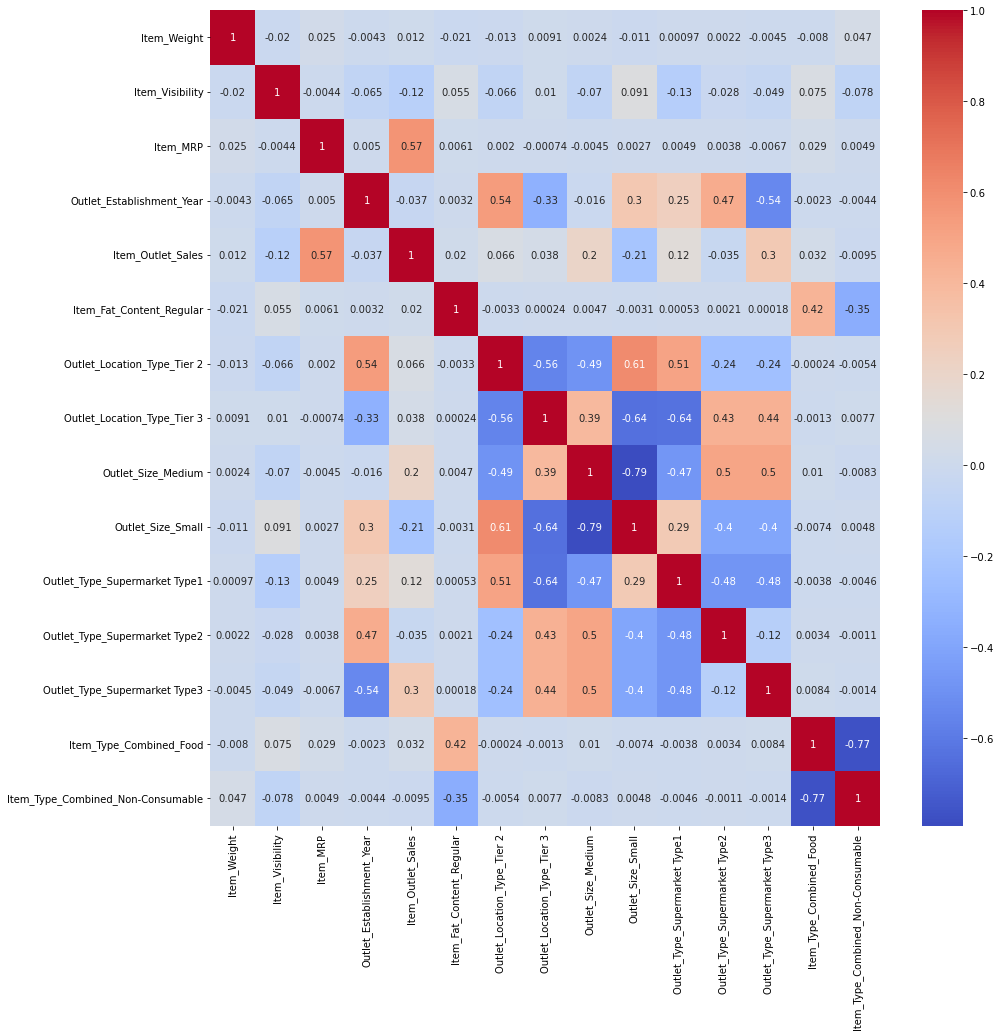

In [158]:
plt.figure(figsize=(15,15))
sns.heatmap(train1.corr(),annot=True,cmap='coolwarm')
plt.show()

Looks like the columns related to Item_Outlet_Sales are Item_Visibility,Item_MRP,Outlet_Size and Outlet_Type

but lets take all features any way

In [87]:
x=train1.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=train1['Item_Outlet_Sales']
test_model=test1.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

# 7. Model Selection

**Train Test Split**

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [90]:
x_train.shape, x_test.shape

((6818, 14), (1705, 14))

**1) Linear Regression**

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
pred_lr=lr.predict(x_test)

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mse_lr=mean_squared_error(y_test,pred_lr)
mse_lr

1019328.765457191

In [96]:
lr.score(x_train,y_train)

0.5717477000279123

In [97]:
acc_lr=lr.score(x_test,y_test)
acc_lr

0.5929177211997411

accuracy of training data is almost equal to test data.So,the model is balanced fit.

**2) Lasso Regression**

In [98]:
from sklearn.linear_model import Lasso

In [99]:
las=Lasso()
las.fit(x_train,y_train)

Lasso()

In [100]:
pred_las=las.predict(x_test)

In [101]:
mse_las=mean_squared_error(y_test,pred_las)
mse_las

1020072.7712361

In [102]:
las.score(x_train,y_train)

0.571390303141614

In [103]:
acc_las=las.score(x_test,y_test)
acc_las

0.5926205927577874

Balanced Fit

In [104]:
#m1,m2,m3......values
las.coef_

array([-1.64451806e+00, -0.00000000e+00,  1.50534704e+01,  4.55557226e+00,
        4.28360109e+01,  5.21292105e+01, -1.03094309e+01,  0.00000000e+00,
       -1.47056517e+02,  1.82657316e+03,  1.39164543e+03,  3.06254146e+03,
        1.59207016e+01,  9.24925315e+00])

In [105]:
las.intercept_

-10685.304863098081

**3) support vector machine**

In [106]:
from sklearn.svm import SVR

In [107]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [108]:
pred_svr=svr.predict(x_test)

In [109]:
mse_svr=mean_squared_error(y_test,pred_svr)
mse_svr

2564697.632718685

In [110]:
svr.score(x_train,y_train)

-0.04614737908192046

In [111]:
acc_svr=svr.score(x_test,y_test)
acc_svr

-0.024245554664079405

Model is little underfit

In [112]:
# model evaluation with cross validation score
from sklearn.model_selection import cross_val_score
svr1=SVR()
svr1.fit(x,y)

SVR()

In [113]:
svr_score=cross_val_score(svr1,x,y,cv=7)
svr_score

array([-0.04487279, -0.04022864, -0.04695868, -0.05649355, -0.04416751,
       -0.04879929, -0.03390929])

In [114]:
svr_score.mean()

-0.045061391658270056

**4) KNN**

In [115]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [117]:
pred_knn=knn.predict(x_test)

In [118]:
mse_knn=mean_squared_error(y_test,pred_knn)
mse_knn

1354361.464330497

In [119]:
knn.score(x_train,y_train)

0.6400692767602361

In [120]:
acc_knn=knn.score(x_test,y_test)
acc_knn

0.45911802952835545

**5) DecisionTree**

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [123]:
pred_dt=dt.predict(x_test)

In [124]:
mse_dt=mean_squared_error(y_test,pred_dt)
mse_dt

1906732.5089200542

In [125]:
dt.score(x_train,y_train)

1.0

In [126]:
acc_dt=dt.score(x_test,y_test)
acc_dt

0.23852142596449777

Clear Overfitting i.e., High Train data accuracy and very low test data accuracy

**6) Random Forest**

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [129]:
pred_rf=rf.predict(x_test)

In [130]:
mse_rf=mean_squared_error(y_test,pred_rf)
mse_rf

1069487.3857253685

In [131]:
rf.score(x_train,y_train)

0.9372890320772278

In [132]:
acc_rf=rf.score(x_test,y_test)
acc_rf

0.5728862199489271

**7) XGBoost**

In [133]:
from xgboost import XGBRegressor

In [134]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [135]:
pred_xgb=xgb.predict(x_test)

In [136]:
mse_xgb=mean_squared_error(y_test,pred_xgb)
mse_xgb

1115149.9797910103

In [137]:
xgb.score(x_train,y_train)

0.8446593504993776

In [138]:
acc_xgb=xgb.score(x_test,y_test)
acc_xgb

0.5546502655855324

Mean squared error of few models is high which can be reduced by **Hyper Parameter Tuning**

lets do this for xgboost regressor model

**Hyper Parameter Tuning for XGBoost**

In [139]:
params={'learning_rate': [0.05,0.1,0.15],
       'max_depth' : [4],
       'min_child_weight' : [5,7,9],
       'gamma': [0.0,0.1,0.2],
       'n_estimators' : [100,300,500,1000]}

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
rs=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [142]:
rs.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [143]:
rs.best_params_

{'n_estimators': 500,
 'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.1}

In [144]:
rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [145]:
xgb1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=7, missing=np.nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [146]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [147]:
pred_xgb1=xgb1.predict(x_test)

In [148]:
mse_xgb1=mean_squared_error(y_test,pred_xgb1)
mse_xgb1

972962.4827996227

In [149]:
xgb1.score(x_train,y_train)

0.6997466055473818

In [150]:
acc_xgb1=xgb1.score(x_test,y_test)
acc_xgb1

0.6114347028089808

In [151]:
#Results of all models
Models=pd.DataFrame({'Models':['Linear Regression','Lasso Regression','SVM','KNN',
                               'Decision Tree','Random Forest','XGBoost','Hyperparameter Tuned XGBoost'],
                    'Mean Squared Error':[mse_lr,mse_las,mse_svr,mse_knn,mse_dt,mse_rf,mse_xgb,mse_xgb1],
                     'accuracy':[acc_lr,acc_las,acc_svr,acc_knn,acc_dt,acc_rf,acc_xgb,acc_xgb1]})

In [152]:
Models.sort_values(by='Mean Squared Error',ascending=True)

,Models,Mean Squared Error,accuracy
7,Hyperparameter Tuned XGBoost,9.729625e+05,0.611435
0,Linear Regression,1.019329e+06,0.592918
1,Lasso Regression,1.020073e+06,0.592621
5,Random Forest,1.069487e+06,0.572886
6,XGBoost,1.115150e+06,0.554650
3,KNN,1.354361e+06,0.459118
4,Decision Tree,1.906733e+06,0.238521
2,SVM,2.564698e+06,-0.024246


We can use top3 models for testing the test dataset as their mean squared error is almost same(low).

# 8. Predicted sales of Test Dataset

In [153]:
predicted_sales=xgb1.predict(test_model)
predicted_sales

array([1525.1019 , 1283.4934 ,  637.25305, ..., 1879.3484 , 3251.7874 ,
       1318.1495 ], dtype=float32)

In [154]:
predicted_sales.shape

(5681,)

In [155]:
test1['Item_Identifier'].count()

5681

In [156]:
Sales=pd.DataFrame({'Item_Identifier':test1['Item_Identifier'],'Predicted_sales':predicted_sales})
Sales

,Item_Identifier,Predicted_sales
8523,FDW58,1525.101929
8524,FDW14,1283.493408
8525,NCN55,637.253052
8526,FDQ58,2408.200439
8527,FDY38,5716.391113
...,...,...
14199,FDB58,2162.299561
14200,FDD47,2890.271973
14201,NCO17,1879.348389
14202,FDJ26,3251.787354


In [157]:
Sales.to_csv('prediction_results.csv')